### Import Packages:

In [1]:
import numpy as np
import cv2
import time
import os

#### Here we are using Yolo pretrained model

#### In this we have Labels,weights,and Model configuration

#### So first Downlaod the clone from original researcher yolo github

#### then call the label,weights, and model confiuration paths.

*Labelpath:*

In [2]:
labels_path=os.path.join('C:\\Users\\nallagoni.omkar\\Desktop\\yolo-object-detection\\yolo-object-detection\\yolo-coco' , 'coco.names')

*See what labels it has:*

In [3]:
LABELS=open(labels_path).read().split('\n')

In [4]:
LABELS

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

#### Assign Random colors for each label:

In [5]:
import random

In [6]:
np.random.seed(42)
colors=np.random.randint(low=0,high=255,size=(len(LABELS),3),dtype="uint8")

In [7]:
colors.shape
print(colors)

[[102 220 225]
 [ 95 179  61]
 [234 203  92]
 [  3  98 243]
 [ 14 149 245]
 [ 46 106 244]
 [ 99 187  71]
 [212 153 199]
 [188 174  65]
 [153  20  44]
 [203 152 102]
 [214 240  39]
 [121  24  34]
 [114 210  65]
 [239  39 214]
 [244 151  25]
 [ 74 145 222]
 [ 14 202  85]
 [145 117  87]
 [184 189 221]
 [116 237 109]
 [ 85  99 172]
 [226 153 103]
 [235 146  36]
 [151  62  68]
 [181 130 160]
 [160 166 149]
 [  6  69   5]
 [ 52 253 112]
 [ 14   1   3]
 [ 76 248  87]
 [233 212 184]
 [235 245  26]
 [213 157 253]
 [ 68 240  37]
 [219  91  54]
 [129   9  51]
 [  0 191  20]
 [140  46 187]
 [147   1 254]
 [ 20 153 243]
 [ 46 160  68]
 [ 19 158 203]
 [209 226  77]
 [ 57  77 149]
 [156  21 112]
 [ 86 134 252]
 [ 24 207   1]
 [235 242 147]
 [110  88 107]
 [231   5  48]
 [254 141  74]
 [218 161  87]
 [134  58 100]
 [162 156 254]
 [ 73  93 102]
 [169 222 181]
 [ 35  71 242]
 [ 11 219 253]
 [201  74 187]
 [ 10  72 249]
 [207 227 201]
 [ 93  14 231]
 [150  59 189]
 [  0 193 116]
 [189 251  49]
 [ 23 174 

In [8]:
len(LABELS)

80

In [9]:
colors.size

240

1)It has total 80 Labels

2)Now we assign different color for each label

*Weight Path:*

In [10]:
weight_path=os.path.join('C:\\Users\\nallagoni.omkar\\Desktop\\yolo-object-detection\\yolo-object-detection\\yolo-coco', 'yolov3.weights')

In [11]:
type(weight_path)

str

*Model configuration path:*

In [12]:
Conf_path=os.path.join('C:\\Users\\nallagoni.omkar\\Desktop\\yolo-object-detection\\yolo-object-detection\\yolo-coco', 'yolov3.cfg')

In [13]:
type(Conf_path)

str

# Load our YOLO object Detector:

##### To laod this we use opencv DNN function

*OpenCv_Dnn:*

Deep Learning is the most popular and the fastest growing area in Computer Vision nowadays. Since OpenCV 3.1 there is DNN module in the library that implements forward pass (inferencing) with deep networks, pre-trained using some popular deep learning frameworks

Since Yolo repository comes from Darknet so we use function:

#### cv2.dnn.readNetFromDarknet(conf_Path, weight_Path)

 This function requires both a Conf_Path  and weight_Path  

In [14]:
print("INFO: loading YOLO model...")
net = cv2.dnn.readNetFromDarknet(Conf_path, weight_path)

INFO: loading YOLO model...


In [15]:
type(net)

cv2.dnn_Net


## Load i/p Image and Identify its Spatial Dimensions:

In [16]:
image=cv2.imread('C:\\Users\\nallagoni.omkar\\Desktop\\yolo-object-detection\\yolo-object-detection\\images\\soccer.jpg')


In [17]:
import matplotlib.pyplot as plt

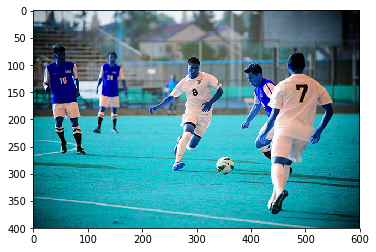

In [18]:
plt.imshow(image)
plt.show()

In [19]:
image.shape

(400, 600, 3)

In [20]:
H,W=image.shape[:2]
H,W

(400, 600)

### Determine the only o/p layer ,that we need from YOLO

In [21]:
ln1=net.getLayerNames()

In [22]:
type(ln1)

list

In [23]:
len(ln1)

254

*So total no.of layers are 254 :*

In [24]:
#ln=[]
#for i in net.getUnconnectedOutLayers():
 #   a=ln[i[0]-1]
  #  ln.append(a)

In [25]:
ln1 = [ln1[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [26]:
ln1

['yolo_82', 'yolo_94', 'yolo_106']

#### So here we have 3 o/p layers 

#### That are ['yolo_82', 'yolo_94', 'yolo_106']

# Constructing a blob:

*What is OpenCV’s blobFromImage:*

**cv2.dnn.blobFromImage**


The function will perform:
    
Mean subtraction

Scaling

And optionally channel swapping

*construct a blob from the input image and then perform a forwardpass of the YOLO object detector, giving us our bounding boxes andassociated probabilities*

In [27]:
blob=cv2.dnn.blobFromImage(image,1/255.0,(416,416),swapRB=True,crop=False)

In [28]:
blob.shape

(1, 3, 416, 416)

#### num_Image=1, num_channels=3, Width=416,height=416 

*----Perform Forward pass------*

In [29]:
net.setInput(blob)


In [30]:
start=time.time()
layer_output=net.forward(ln1)
end=time.time()
# show timing information on YOLO
print(" YOLO took {:.6f} seconds".format(end - start))

 YOLO took 7.653458 seconds


##### We done:

###### Load the input image  and extract its dimensions.

###### Determine the output layer names from the YOLO model.

###### Construct a blob  from the image. Are you confused about what a blob is or what the cv2.dnn.blobFromImage  does? Give this blog post a read.Now that our blob is prepared, we’ll

###### Perform a forward pass through our YOLO network.

###### Show the inference time for YOLO.

## Bounding Boxes----Confidences------classId:

*Initialize the list of Bounding boxes,confidences,classIds respectively:*

In [31]:
boxes=[]
confidences=[]
classIDs=[]

*Boxes:*
    
    Our bounding boxes around the object.
    
*confidences:*
    
    The confidence value that YOLO assigns to an object. 
    
    Lower confidence values indicate that the object might not be what the network thinks it is.
    
    Threshold=0.5
    
*classIDs:*
    
    The detected object’s class label.

#### populating the lists:


In [32]:
#loop over each of the layes outputs
for output in layer_output:
    for detection in output:
        # extract the class ID and confidence (i.e., probability) of
        # the current object detection
        scores=detection[5:]
        classID=np.argmax(scores)
        confidence=scores[classID]
        # filter out weak predictions by ensuring the detected
        # probability is greater than the minimum probability
        if confidence>0.5:
            # scale the bounding box coordinates back relative to the size of the image, keeping in mind that YOLO actually
            # returns the center (x, y)-coordinates of the bounding
            # box followed by the boxes' width and height
            box=detection[0:4]*np.array([W,H,W,H])
            (center_X,center_Y,width,height)=box.astype("int")
            # use the center (x, y)-coordinates to derive the top and
            # and left corner of the bounding box
            x=int(center_X-(width/2))
            y=int(center_Y-(height/2))
            # update our list of bounding box coordinates, confidences, and class IDs
            boxes.append([x,y,int(width),int(height)])
            confidences.append(float(confidence))
            classIDs.append(classID)

In [33]:
len(detection),len(output),len(layer_output)

(85, 8112, 3)

In [34]:
detection

array([9.8788071e-01, 9.9165767e-01, 1.7601530e-01, 1.9260712e-02,
       8.7462013e-07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [35]:
scores

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [36]:
len(boxes),len(confidences),len(classIDs)

(10, 10, 10)

In [37]:
boxes

[[16, 57, 99, 216],
 [222, 82, 122, 215],
 [403, 80, 156, 294],
 [109, 70, 63, 160],
 [231, 116, 36, 67],
 [19, 63, 76, 202],
 [375, 99, 71, 124],
 [231, 87, 107, 206],
 [332, 267, 39, 38],
 [333, 268, 37, 33]]

In [38]:
confidences

[0.6825350522994995,
 0.9999827146530151,
 0.9993833303451538,
 0.9998749494552612,
 0.9040888547897339,
 0.999611496925354,
 0.6146250367164612,
 0.7169444561004639,
 0.9186165928840637,
 0.9992114305496216]

In [39]:
classIDs

[0, 0, 0, 0, 0, 0, 0, 0, 32, 32]

In [40]:
LABELS[1],LABELS[28],LABELS[26]

('bicycle', 'suitcase', 'handbag')

#### In this block, we:

(i) Loop over each of the layerOutputs.

(ii) Loop over each detection  in output.

(iii) Extract the classID  and confidence.

(iv) Use the confidence to filter out weak detections.

#### Now that we’ve filtered out unwanted detections, we’re going to:

(v) Scale bounding box coordinates so we can display them properly on our original image.

(vi) Extract coordinates and dimensions of the bounding box. YOLO returns bounding box coordinates in the form: (centerX, centerY, width, and height).
    
(vii) Use this information to derive the top-left (x, y)-coordinates of the bounding box.

(viii) Update the boxes , confidences , and classIDs  lists.

### Non Max suppression:

*Applying non-maxima suppression suppresses significantly overlapping bounding boxes, keeping only the most confident ones.*

*NMS also ensures that we do not have any redundant or extraneous bounding boxes.*

*Taking advantage of OpenCV’s built-in DNN module implementation of NMS,*

*we perform non-maxima suppression on Lines. All that is required is that we submit our bounding boxes , confidences , as well as both our confidence threshold and NMS threshold.*

In [41]:
# apply non-maxima suppression to suppress weak, overlapping bounding boxes
idxs=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.3)

In [42]:
type(idxs)

numpy.ndarray

In [43]:
len(idxs)

7

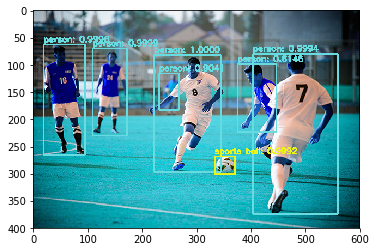

YOLO took 7.653458 seconds


In [44]:
# ensure at least one detection exists
if len(idxs) > 0:
    # loop over the indexes we are keeping
    for i in idxs.flatten():
        # extract the bounding box coordinates
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])
 
        # draw a bounding box rectangle and label on the image
        color = [int(c) for c in colors[classIDs[i]]]
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
        cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,0.5, color, 2)
 
 #show the output image
plt.imshow(image)
plt.show()
cv2.imshow('Image',image)
cv2.waitKey(0)
print("YOLO took {:.6f} seconds".format(end - start))

# Vedio Annotation:

In [45]:
import cv2
import numpy as np

In [ ]:
vs = cv2.VideoCapture('C:\\Users\\nallagoni.omkar\\Desktop\\yolo-object-detection\\yolo-object-detection\\videos\\car_chase_01.mp4')
grabbed,frame=vs.read()
vid_frames=[]
i=1
while(grabbed):
    if i % 10==0:
        vid_frames.append(frame)
    grabbed,frame=vs.read()
    i+=1
    vid_frames=np.asarray(vid_frames,dtype="uint8")[:-1]
vs.release()

In [ ]:
import imutils

In [ ]:
# try to determine the total number of frames in the video file
try:
    prop = cv2.cv.CV_CAP_PROP_FRAME_COUNT if imutils.is_cv2() \
       else cv2.CAP_PROP_FRAME_COUNT
    total = int(vs.get(prop))
    print("[INFO] {} total frames in video".format(total))
except:
	print("[INFO] could not determine # of frames in video")
	print("[INFO] no approx. completion time can be provided")
	total = -1

In [ ]:
total

In [ ]:
import cv2
def load_videos(video_file):
    # print "load_videos"
    capture = cv2.VideoCapture(video_file)

    read_flag, frame = capture.read()
    vid_frames = []
    i=1
    # print read_flag

    while (read_flag):
        if i%10==0:
            vid_frames.append(frame)
            read_flag, frame = capture.read()
        i+=1
    vid_frames = np.asarray(vid_frames, dtype='uint8')[:-1]
    # print 'vid shape'
    # print vid_frames.shape
    capture.release()
    return vid_frames 

In [ ]:
vid_frames=load_videos('C:\\Users\\nallagoni.omkar\\Desktop\\yolo-object-detection\\yolo-object-detection\\videos\\car_chase_01.mp4')
writer=None
(W,H)=(None,None)

In [ ]:
type(vid_frames)

In [ ]:
len(vid_frames)

In [ ]:
while(vs.isOpened()):
    ret,frame=vs.read()
    if ret==True:
        vid_frames = np.asarray(vid_frames, dtype='uint8')[:-1]
    else:
        break

In [ ]:
currentFrame=0
frames=[]
while True:
    (grabbed,frame)=vs.read()
    name = 'frame' + str(currentFrame) + '.jpg'
    #print ('Creating...' + name)
    #cv2.imwrite(name, frame)
    currentFrame+=1
    frames.append(currentFrame)
    if not grabbed:
        break
#vs.release()
#cv2.destroyAllWindows()

In [ ]:
(H,W)=vid_frames.shape[1:3]

In [ ]:
H,W

In [ ]:
net = cv2.dnn.readNetFromDarknet(Conf_path, weight_path)
ln1= net.getLayerNames()
ln1 = [ln1[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [ ]:
for frame in vid_frames:
    blob = cv2.dnn.blobFromImage(frame, 1 / 255.0, (416, 416),swapRB=True, crop=False)
    net.setInput(blob)
    start = time.time()
    layerOutputs = net.forward(ln1)
    end = time.time()
 

In [ ]:
boxes=[]
confidences=[]
classIDs=[]

In [ ]:
#loop over each of the layes outputs
for output in layer_output:
    for detection in output:
        # extract the class ID and confidence (i.e., probability) of
        # the current object detection
        scores=detection[5:]
        classID=np.argmax(scores)
        confidence=scores[classID]
        # filter out weak predictions by ensuring the detected
        # probability is greater than the minimum probability
        if confidence>0.5:
            # scale the bounding box coordinates back relative to the size of the image, keeping in mind that YOLO actually
            # returns the center (x, y)-coordinates of the bounding
            # box followed by the boxes' width and height
            box=detection[0:4]*np.array([W,H,W,H])
            (center_X,center_Y,width,height)=box.astype("int")
            # use the center (x, y)-coordinates to derive the top and
            # and left corner of the bounding box
            x=int(center_X-(width/2))
            y=int(center_Y-(height/2))
            # update our list of bounding box coordinates, confidences, and class IDs
            boxes.append([x,y,int(width),int(height)])
            confidences.append(float(confidence))
            classIDs.append(classID)

In [ ]:
# apply non-maxima suppression to suppress weak, overlapping bounding boxes
idxs=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.3)

In [ ]:
len(idxs)

In [ ]:
# ensure at least one detection exists
if len(idxs) > 0:
    # loop over the indexes we are keeping
    for i in idxs.flatten():
        # extract the bounding box coordinates
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])
        for frame in vid_frames:
            # draw a bounding box rectangle and label on the image
            color = [int(c) for c in colors[classIDs[i]]]
            cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
            text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
            cv2.putText(frame, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,0.5, color, 2)

In [ ]:
vid_frames.shape[2]

In [ ]:
#if writer is None:
#if writer is None:
    # initialize our video writer
fourcc = cv2.VideoWriter_fourcc(*"XVID")
writer = cv2.VideoWriter('C:\\Users\\nallagoni.omkar\\Desktop\\yolo-object-detection\\yolo-object-detection\\output1.avi',fourcc, 30,(frame.shape[2], frame.shape[1]), True)
for frame in vid_frames:
    writer.write(frame)
writer.release()
#vs.release()

In [ ]:
for frame in vid_frames:
    fourcc = cv2.VideoWriter_fourcc(*"XVID")
    writer = cv2.VideoWriter('C:\\Users\\nallagoni.omkar\\Desktop\\yolo-object-detection\\yolo-object-detection\\output1.avi',fourcc, 30,(frame.shape[2], frame.shape[1]), True)
    writer.write(frame)
writer.release()

In [ ]:
# check if the video writer is None
if writer is None:
    for frame in vid_frames:
        # initialize our video writer
        fourcc = cv2.VideoWriter_fourcc(*"XVID")
        writer = cv2.VideoWriter('C:\\Users\\nallagoni.omkar\\Desktop\\yolo-object-detection\\yolo-object-detection\\output.avi', 
                                 fourcc, 30,(frame.shape[2], frame.shape[1]), True)
        # some information on processing single frame
    if total > 0:
        elap = (end - start)
        print("[INFO] single frame took {:.4f} seconds".format(elap))
        print("[INFO] estimated total time to finish: {:.4f}".format(elap * total))
 #write the output frame to disk
writer.write(frame)
 
print("[INFO] cleaning up...")
writer.release()
#capture.release()

In [ ]:
for frame in vid_frames:
    # initialize our video writer
    fourcc = cv2.VideoWriter_fourcc(*"XVID")
    writer = cv2.VideoWriter('C:\\Users\\nallagoni.omkar\\Desktop\\yolo-object-detection\\yolo-object-detection\\output.avi', 
                                 fourcc, 30,(frame.shape[2], frame.shape[1]), True)
    # some information on processing single frame
if total > 0:
    elap = (end - start)
    print("[INFO] single frame took {:.4f} seconds".format(elap))
    print("[INFO] estimated total time to finish: {:.4f}".format(elap * total))
 #write the output frame to disk
writer.write(frame)
 
print("[INFO] cleaning up...")
writer.release()
#vs.release()

In [ ]:
# check if the video writer is None
if writer is None:
    fourcc = cv2.VideoWriter_fourcc(*"XVID")
    writer = cv2.VideoWriter('C:\\Users\\nallagoni.omkar\\Desktop\\yolo-object-detection\\yolo-object-detection\\output.avi', fourcc, 30,(frame[i].shape[1], frame[i].shape[0]), True)
    for frame in vid_frames:
        writer.write(frame) 
writer.release()

In [ ]:
image = np.dstack([gray] * 3)